IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

EXPLORATORY DATA ANALYSIS

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
gold_data.duplicated().sum()

0

Time Features

In [11]:
# Convert Date to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

gold_data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2290 entries, 0 to 2289
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2290 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.0 KB


In [12]:
# Extract time-based features

gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8


In [13]:
# Also Use Date as Index – Best for Time Series Analysis
gold_time_series = gold_data.copy()
gold_time_series.set_index('Date',inplace=True)
gold_time_series.head(2)

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
Date,,,,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3


Perform Univariate Analysis (Distribution of individual variables)

Numerical Features

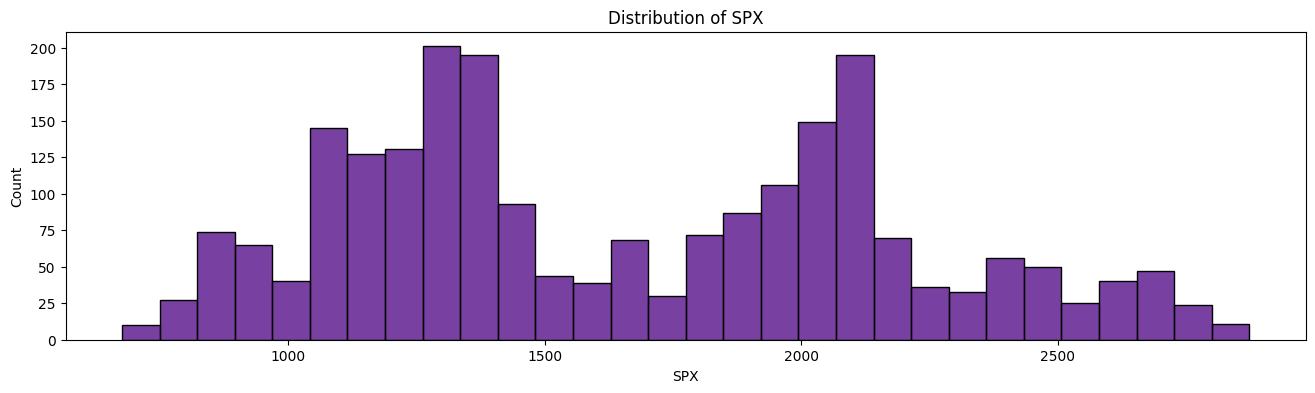

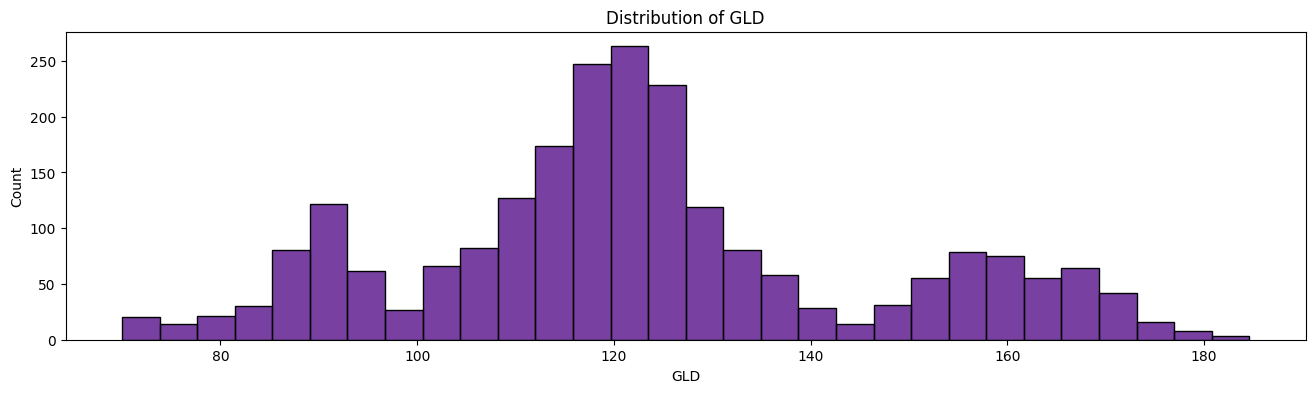

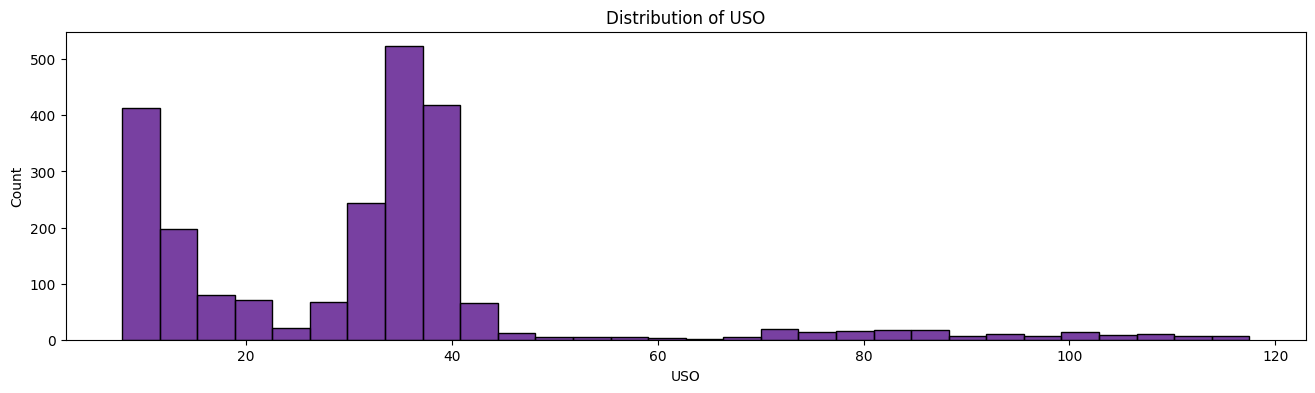

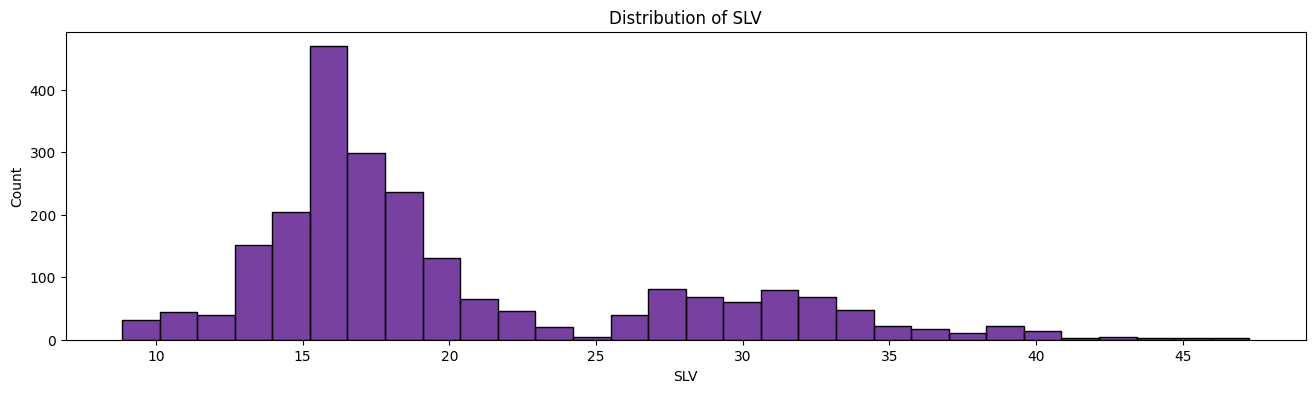

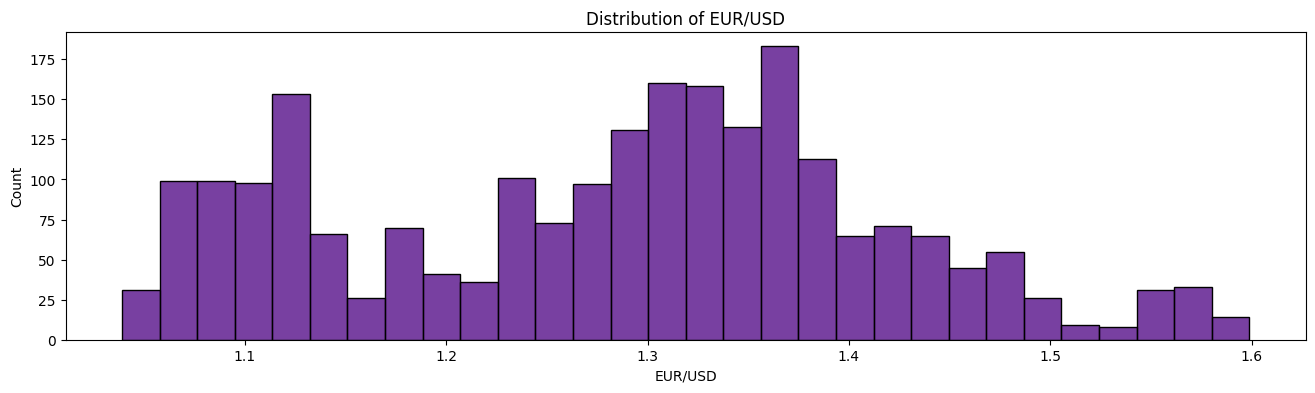

In [14]:
for col in gold_data.select_dtypes(include='float64'):
    plt.figure(figsize=(16,4))
    sns.histplot(gold_data[col],bins=30,color='Indigo')
    plt.title(f'Distribution of {col}')
    plt.show()

Bivariate Analysis

Correlation Heatmap

In [15]:
correlation = gold_data.select_dtypes(include='number').corr()

<Axes: >

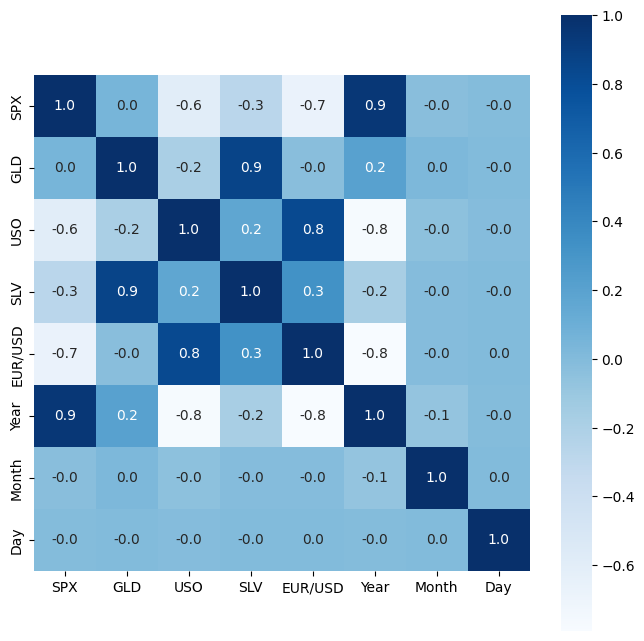

In [16]:
# constucting heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cmap='Blues',annot=True,square=True,fmt='.1f')

In [17]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


C:\Users\shaha\AppData\Local\Temp\ipykernel_13768\3685130541.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

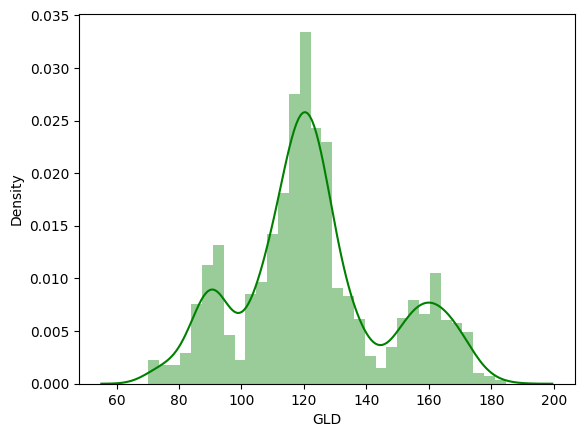

In [18]:
# checking distrubtion of GLD Price
sns.distplot(gold_data['GLD'],color='green')

Pairplot

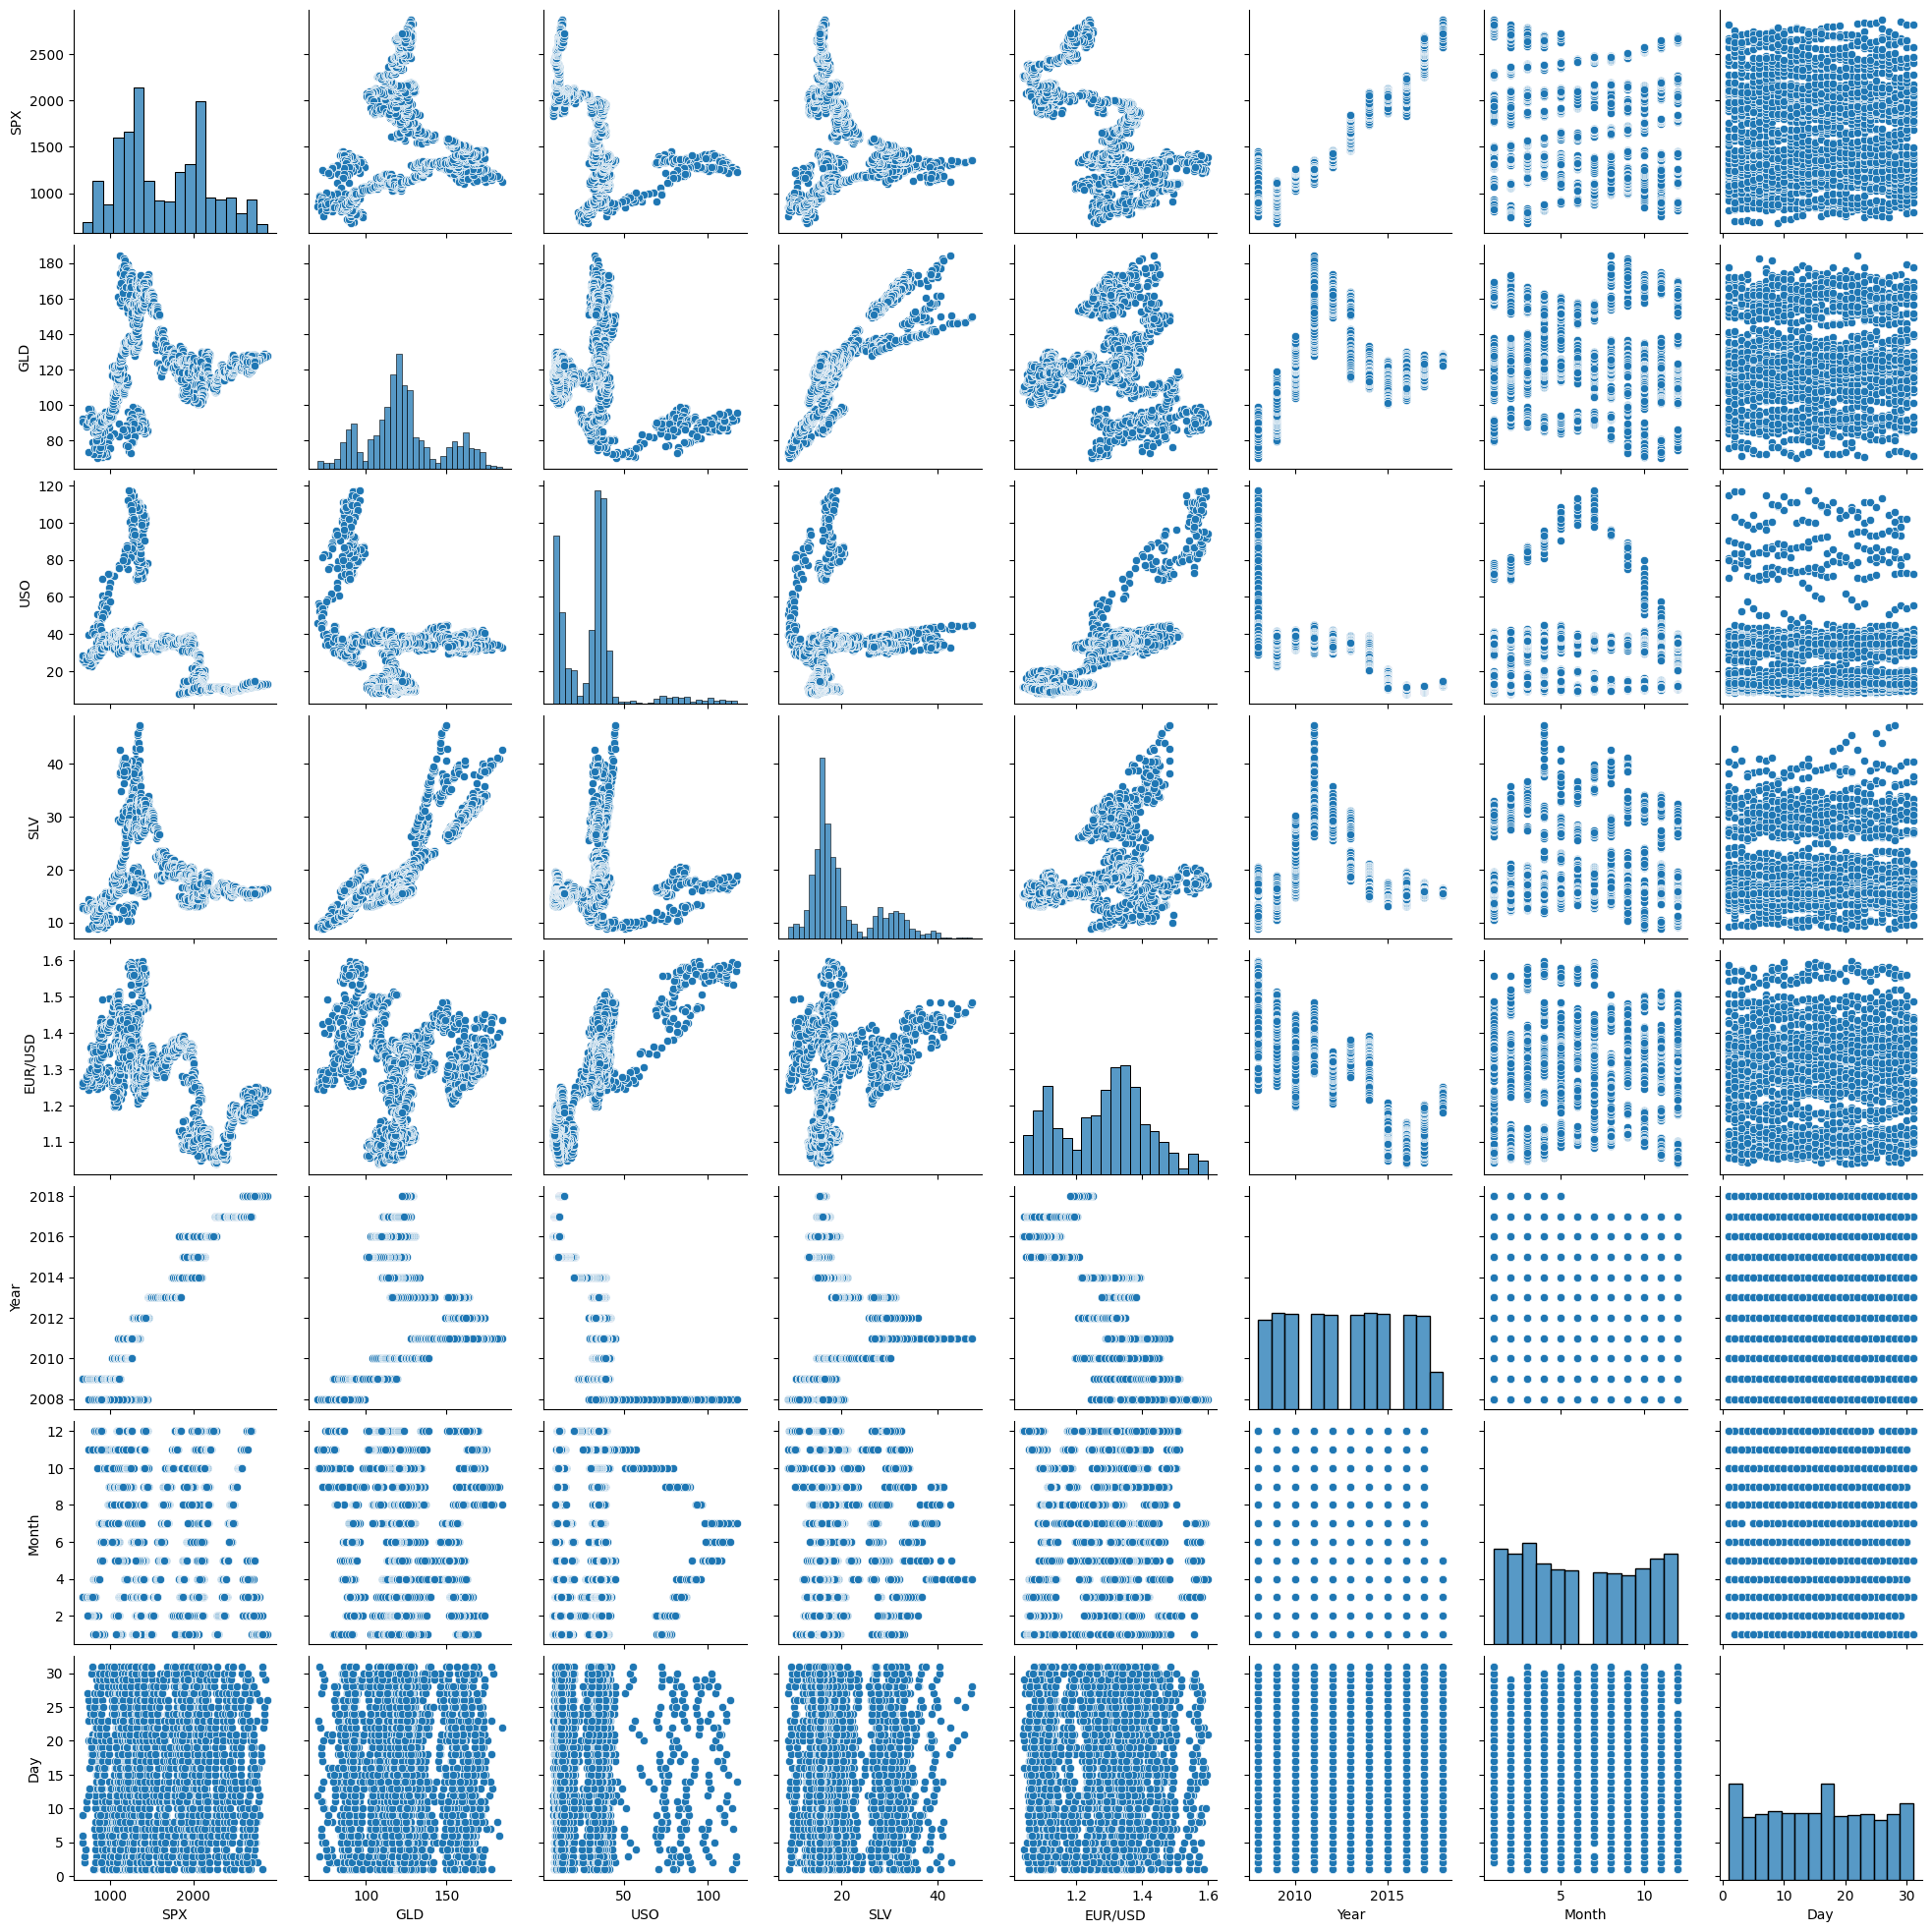

In [19]:
sns.pairplot(gold_data.select_dtypes(include='number'))

Scatter Plots with Target (GLD)

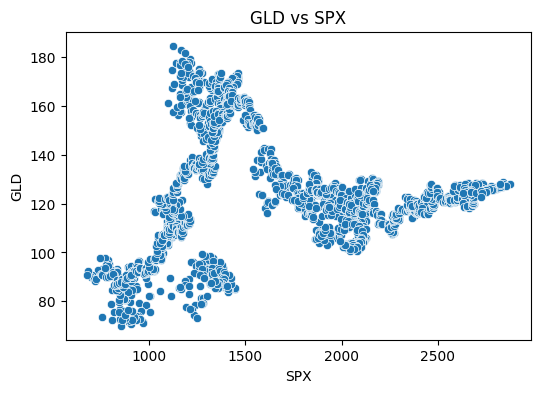

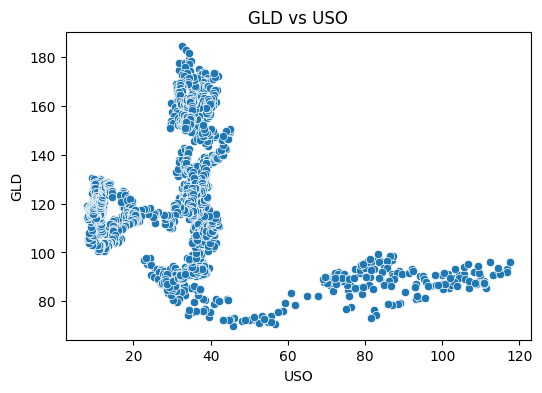

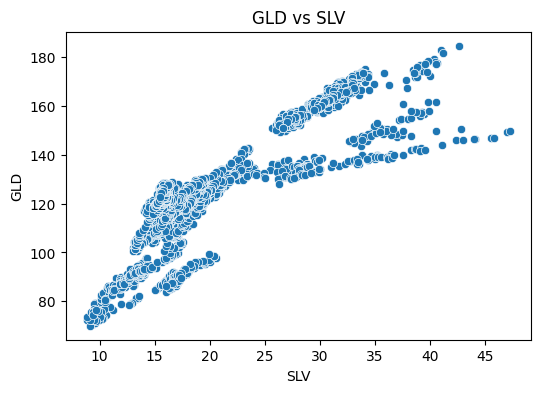

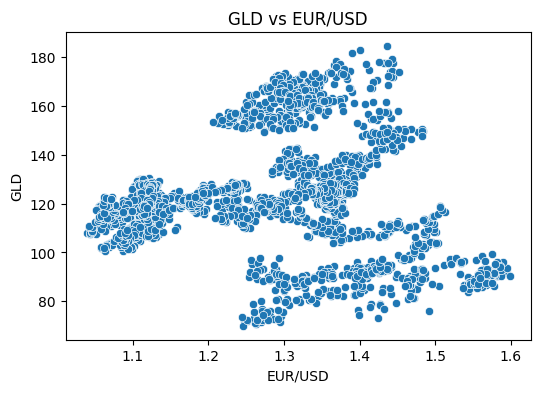

In [20]:
for col in ['SPX','USO','SLV','EUR/USD']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=gold_data[col],y=gold_data['GLD'])
    plt.title(f'GLD vs {col}')
    plt.show()

Time Series Analysis 

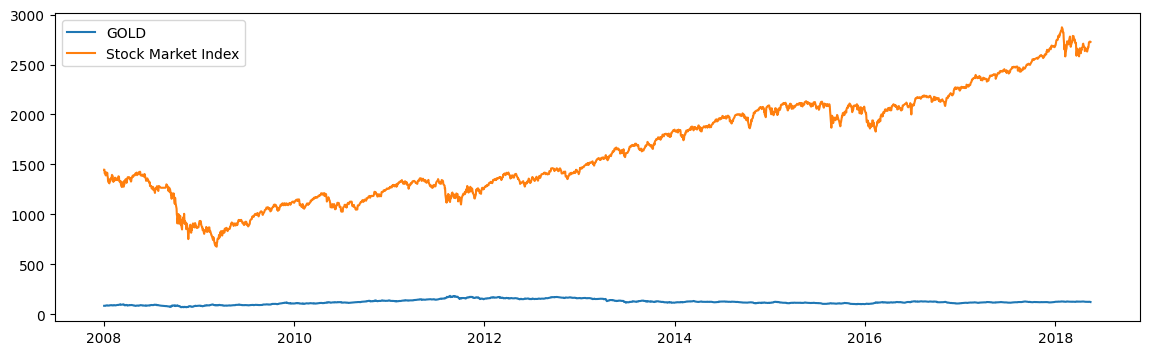

In [21]:
# Line Plots over Time
plt.figure(figsize=(14,4))
plt.plot(gold_data['Date'],gold_data['GLD'],label='GOLD')
plt.plot(gold_data['Date'],gold_data['SPX'],label='Stock Market Index')
plt.legend()
plt.show()

Statistical Measure - Skewness

In [22]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653,2012.724891,6.329258,15.644541
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047,2008.000000,1.000000,1.000000
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313,2010.000000,3.000000,8.000000
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297,2013.000000,6.000000,15.500000
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971,2015.000000,10.000000,23.000000
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798,2018.000000,12.000000,31.000000
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547,2.993271,3.591149,8.746132


In [23]:
# only numeric columns
num_cols = gold_data.select_dtypes(include='number').columns

from scipy.stats import skew
print(gold_data[num_cols].skew())

SPX        0.300362
GLD        0.334138
USO        1.699331
SLV        1.153641
EUR/USD   -0.005292
Year       0.021620
Month      0.089688
Day        0.028568
dtype: float64


In [24]:
# -ve values means left skewed and +ve value the opposite
# SLV and USO has high skewness as its value outside range (-1,1)

Boxplots (check for outliers)

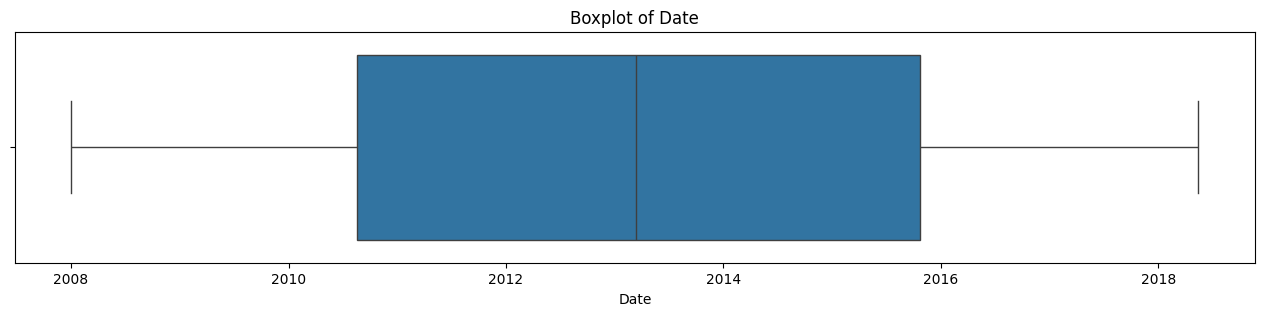

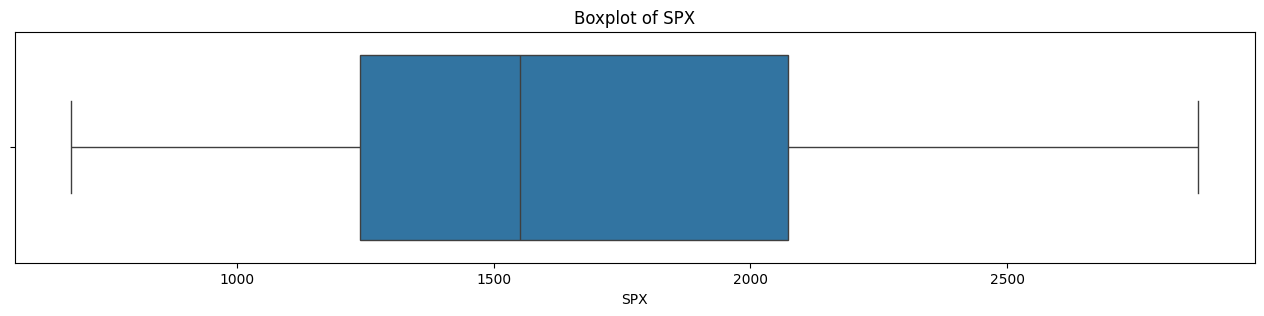

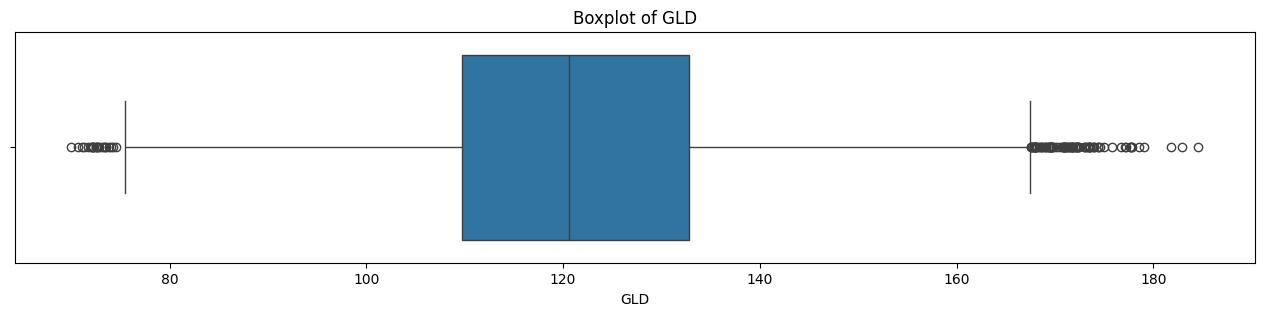

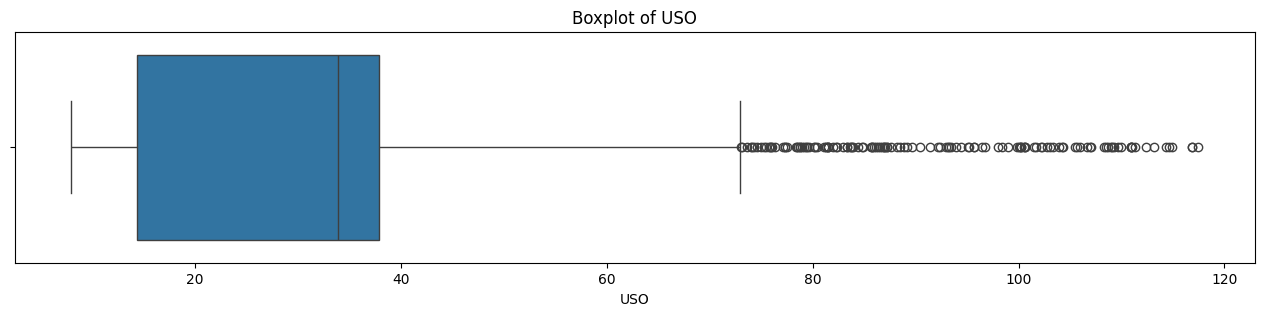

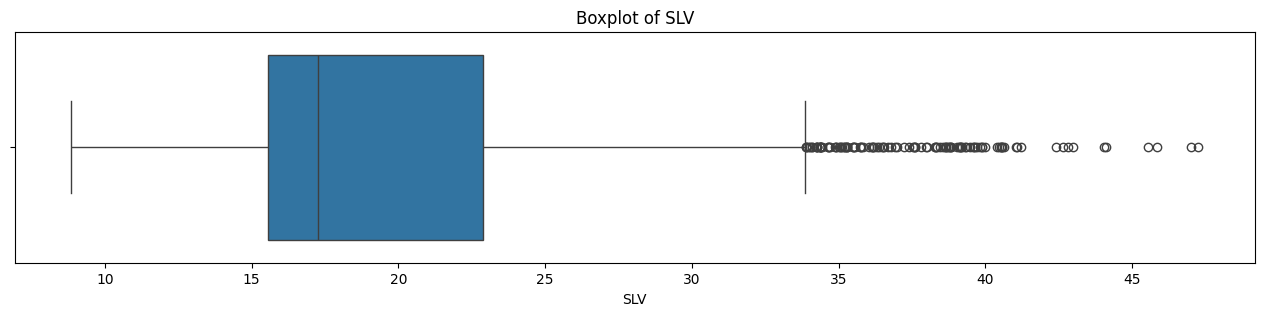

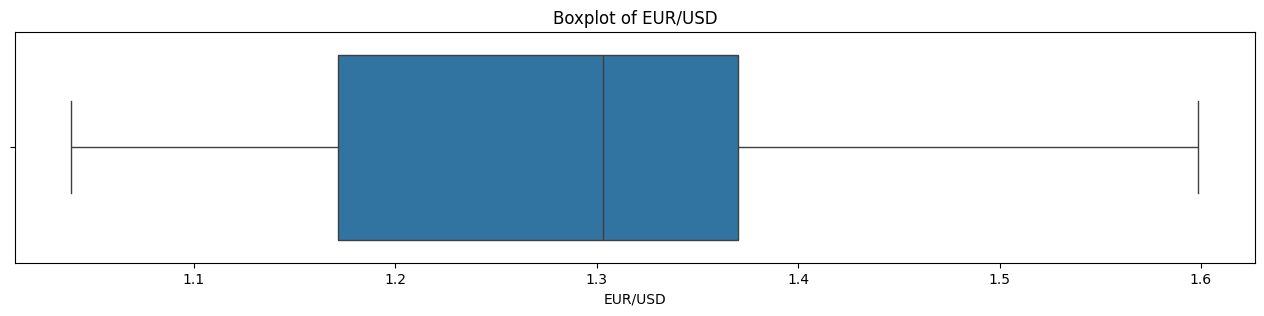

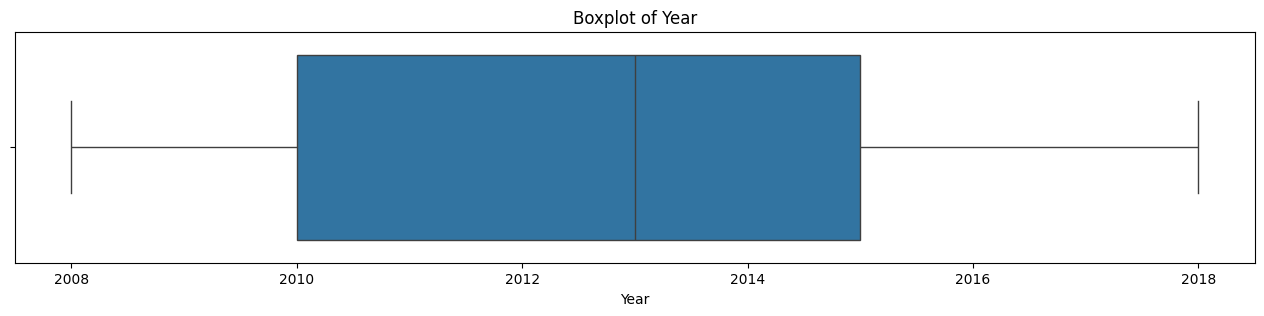

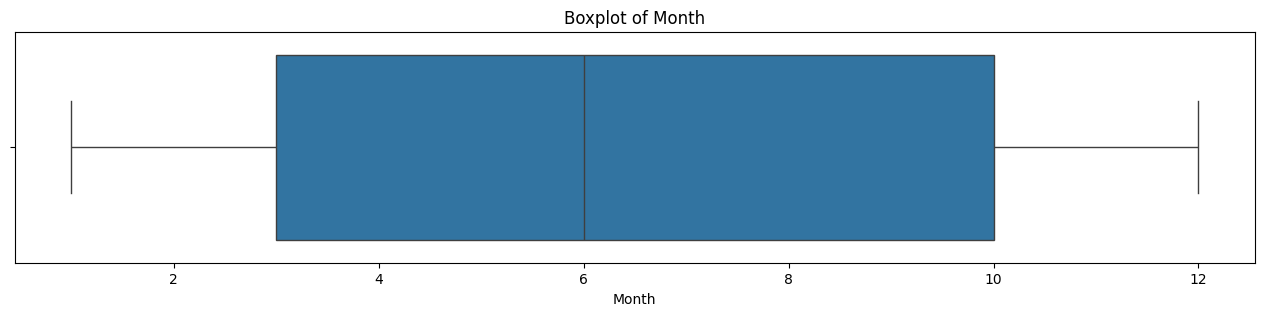

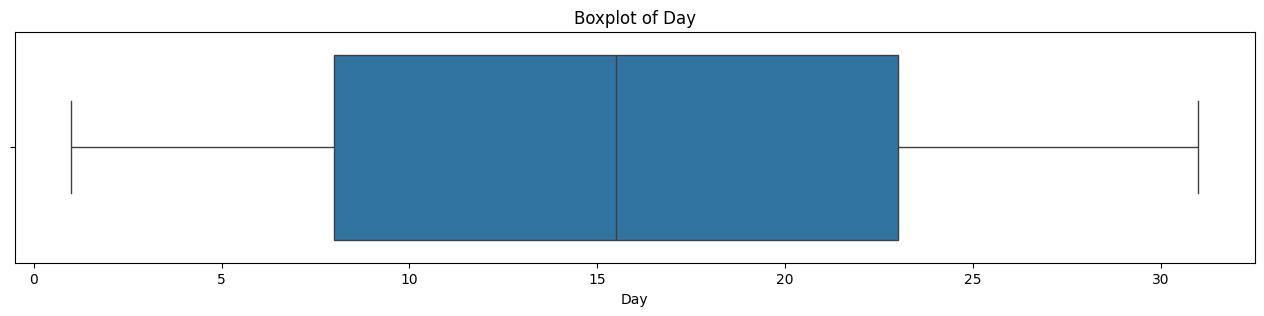

In [25]:
for col in gold_data:
    plt.figure(figsize=(16,3))
    sns.boxplot(x=gold_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Outlier Removal

In [26]:
detect = ['USO','SLV']
# These are features that has outliers

for col in detect:
    Q1 = gold_data[col].quantile(0.25)
    Q3 = gold_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    gold_data[col] = gold_data[col].clip(lower,upper)

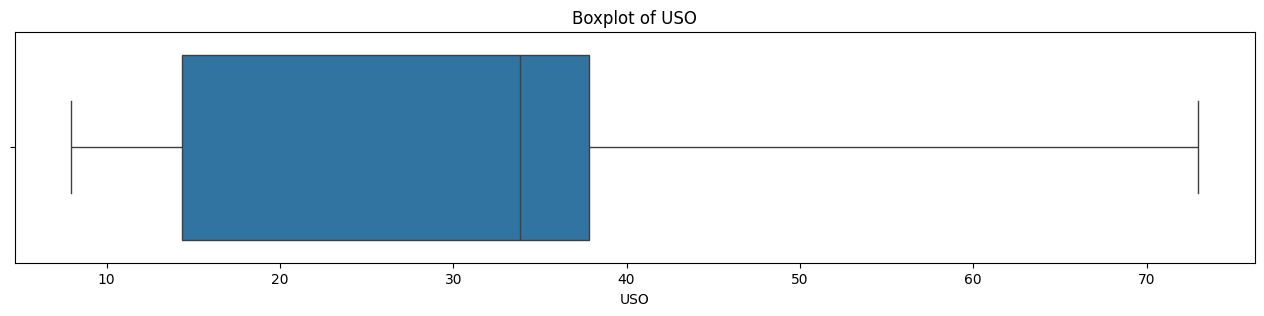

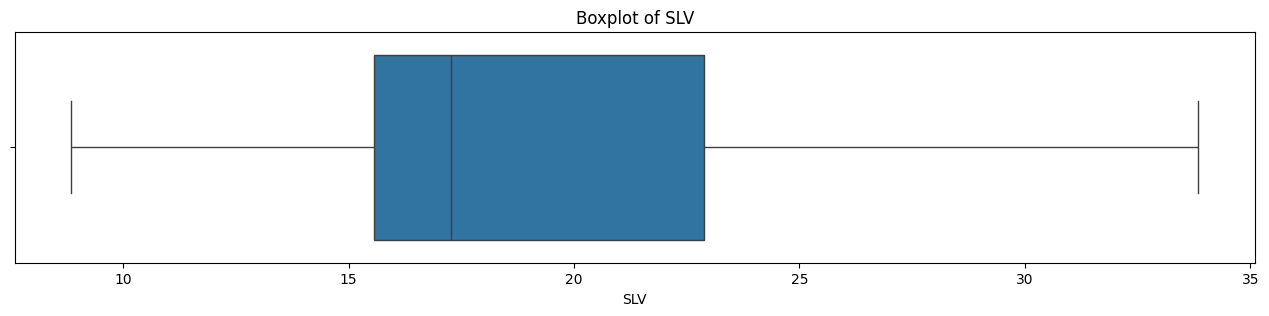

In [27]:
for col in detect:
    plt.figure(figsize=(16,3))
    sns.boxplot(x=gold_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [28]:
# Outliers Removed

DATA PREPROCESSING

In [29]:
# No missing values to handle , if had any we could use filling or dropping techniques
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
Year       0
Month      0
Day        0
dtype: int64

Feature Engineering

In [30]:
# Feature Selection
# Adding an Extra Feature

gold_data['GLD_lag3'] = gold_data['GLD'].shift(1)
gold_data['GLD_lag7'] = gold_data['GLD'].shift(4)
# Price before 1 day and 4 day

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day,GLD_lag3,GLD_lag7
0,2008-01-02,1447.160034,84.860001,72.998754,15.180,1.471692,2008,1,2,NaN,NaN
1,2008-01-03,1447.160034,85.570000,72.998754,15.285,1.474491,2008,1,3,84.860001,NaN
2,2008-01-04,1411.630005,85.129997,72.998754,15.167,1.475492,2008,1,4,85.570000,NaN
3,2008-01-07,1416.180054,84.769997,72.998754,15.053,1.468299,2008,1,7,85.129997,NaN
4,2008-01-08,1390.189941,86.779999,72.998754,15.590,1.557099,2008,1,8,84.769997,84.860001


In [31]:
# Dropping the null part
gold_data.dropna(inplace=True)
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day,GLD_lag3,GLD_lag7
4,2008-01-08,1390.189941,86.779999,72.998754,15.590000,1.557099,2008,1,8,84.769997,84.860001
5,2008-01-09,1409.130005,86.550003,72.998754,15.520000,1.466405,2008,1,9,86.779999,85.570000
6,2008-01-10,1420.329956,88.250000,72.998754,16.061001,1.480100,2008,1,10,86.550003,85.129997
7,2008-01-11,1401.020020,88.580002,72.998754,16.077000,1.479006,2008,1,11,88.250000,84.769997
8,2008-01-14,1416.250000,89.540001,72.998754,16.280001,1.486900,2008,1,14,88.580002,86.779999


Feature Scaling

In [32]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day,GLD_lag3,GLD_lag7
4,2008-01-08,1390.189941,86.779999,72.998754,15.590000,1.557099,2008,1,8,84.769997,84.860001
5,2008-01-09,1409.130005,86.550003,72.998754,15.520000,1.466405,2008,1,9,86.779999,85.570000
6,2008-01-10,1420.329956,88.250000,72.998754,16.061001,1.480100,2008,1,10,86.550003,85.129997
7,2008-01-11,1401.020020,88.580002,72.998754,16.077000,1.479006,2008,1,11,88.250000,84.769997
8,2008-01-14,1416.250000,89.540001,72.998754,16.280001,1.486900,2008,1,14,88.580002,86.779999


In [33]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
gold_data[['SPX','USO','SLV']] = scaler.fit_transform(gold_data[['SPX','USO','SLV']])

In [34]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day,GLD_lag3,GLD_lag7
4,2008-01-08,-0.509307,86.779999,2.64373,-0.651651,1.557099,2008,1,8,84.769997,84.860001
5,2008-01-09,-0.472840,86.550003,2.64373,-0.662239,1.466405,2008,1,9,86.779999,85.570000
6,2008-01-10,-0.451275,88.250000,2.64373,-0.580407,1.480100,2008,1,10,86.550003,85.129997
7,2008-01-11,-0.488455,88.580002,2.64373,-0.577987,1.479006,2008,1,11,88.250000,84.769997
8,2008-01-14,-0.459131,89.540001,2.64373,-0.547281,1.486900,2008,1,14,88.580002,86.779999


VISUALIZATION - TREND & CORRELATION ANALYSIS

Trend Analysis

In [46]:
num_cols

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month', 'Day'], dtype='object')

In [76]:
main_cols = ['SPX','USO', 'SLV', 'EUR/USD']

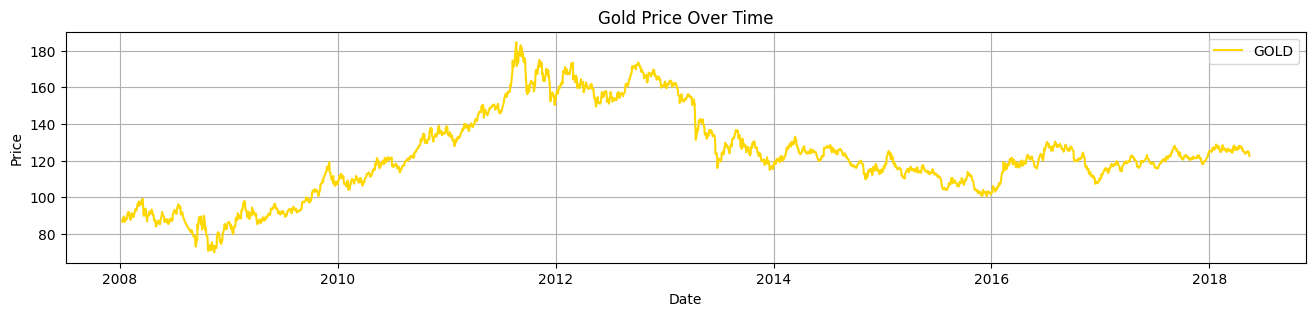

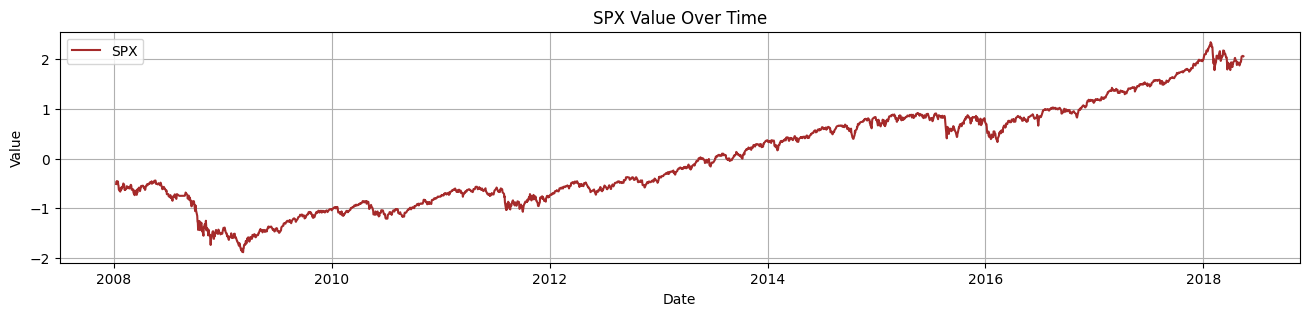

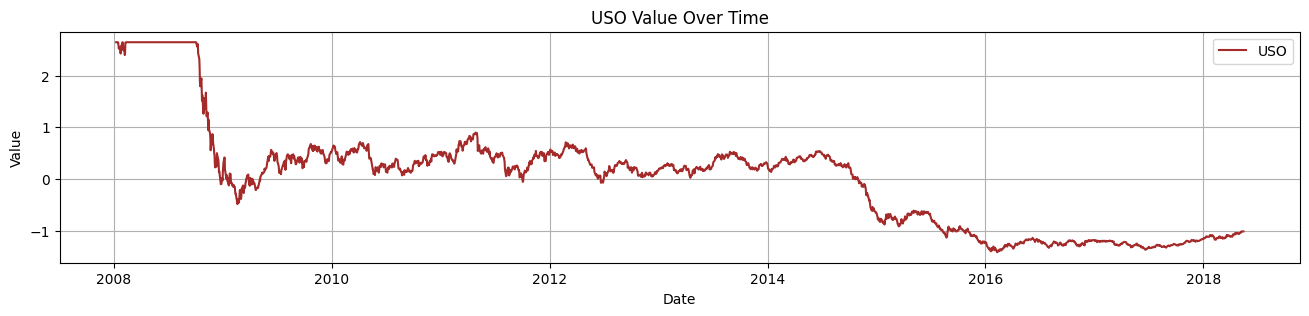

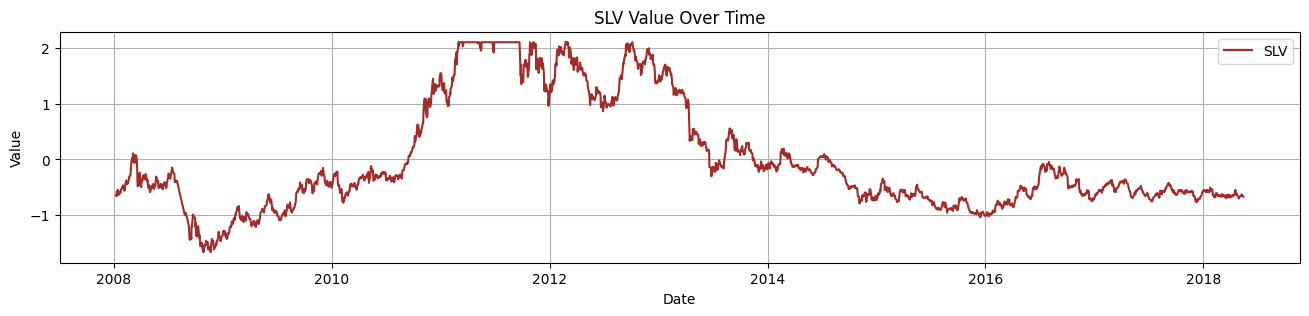

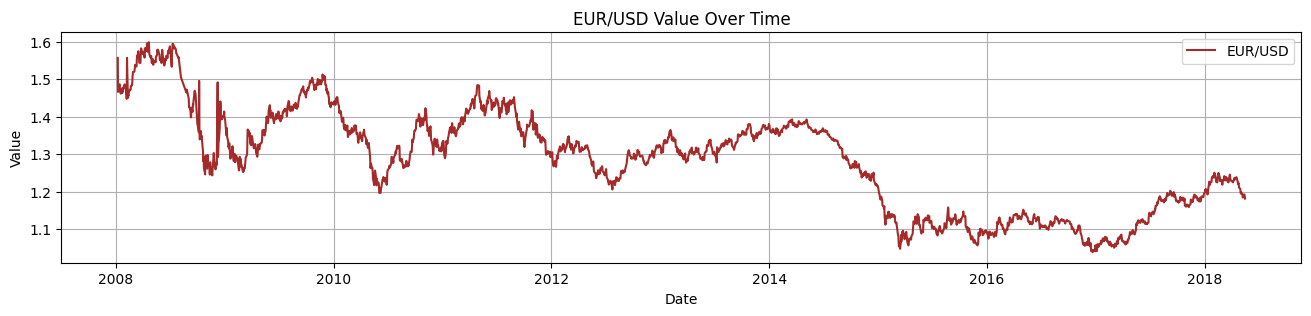

In [77]:
# Line Plots over Time

plt.figure(figsize=(16,3))
plt.plot(gold_data['Date'],gold_data['GLD'],label='GOLD',color='gold')
plt.title(f'Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

for col in main_cols:
    plt.figure(figsize=(16,3))
    plt.plot(gold_data['Date'],gold_data[col],label={col},color='Brown')
    plt.title(f'{col} Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

Overlay Plot (GLD vs USO)

In [78]:
# Scaling Gold for visualization purpose
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(gold_data[['GLD', 'USO']])

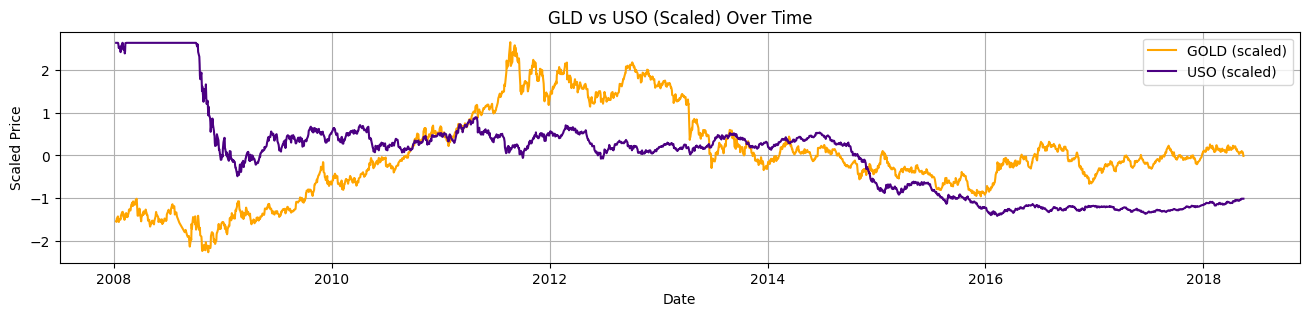

In [80]:
plt.figure(figsize=(16,3))
plt.plot(gold_data['Date'],scaled[:, 0],label='GOLD (scaled)',color='orange')
plt.plot(gold_data['Date'],scaled[:, 1],label='USO (scaled)',color='indigo')
plt.title('GLD vs USO (Scaled) Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.grid(True)
plt.legend()
plt.show()

MODELING

Splitting Features and Target

In [81]:
from sklearn.model_selection import train_test_split

x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

Splitting to Train and Test data

In [83]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2,shuffle=False)
# setting suffle to false is better for time based data

Model Training Along with Particular Model Evaluation

Baseline Models

Linear Regression

In [109]:
# Training
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)

# Evaluation
from sklearn.metrics import r2_score , root_mean_squared_error , mean_absolute_error,mean_squared_error

r2_linear = r2_score(y_test,y_pred)
rmse_linear = root_mean_squared_error(y_test,y_pred)
mse_linear = mean_squared_error(y_test,y_pred)
mae_linear = mean_absolute_error(y_test,y_pred)

print(f'Linear Regression - R2 : {r2_linear:.2f}')
print(f'Linear Regression - RMSE : {rmse_linear:.2f}')
print(f'Linear Regression - MSE : {mse_linear:.2f}')
print(f'Linear Regression - MAE : {mae_linear:.2f}')

Linear Regression - R2 : 0.96
Linear Regression - RMSE : 1.03
Linear Regression - MSE : 1.05
Linear Regression - MAE : 0.77


Ridge Regression

In [110]:
# Training
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_ridge = r2_score(y_test,y_pred)
rmse_ridge = root_mean_squared_error(y_test,y_pred)
mse_ridge = mean_squared_error(y_test,y_pred)
mae_ridge = mean_absolute_error(y_test,y_pred)

print(f'Ridge Regression - R2 : {r2_ridge:.2f}')
print(f'Ridge Regression - RMSE : {rmse_ridge:.2f}')
print(f'Ridge Regression - MSE : {mse_ridge:.2f}')
print(f'Ridge Regression - MAE : {mae_ridge:.2f}')


Ridge Regression - R2 : 0.96
Ridge Regression - RMSE : 1.02
Ridge Regression - MSE : 1.05
Ridge Regression - MAE : 0.77


Lasso Regression

In [111]:
# Training
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_lasso = r2_score(y_test,y_pred)
rmse_lasso = root_mean_squared_error(y_test,y_pred)
mse_lasso = mean_squared_error(y_test,y_pred)
mae_lasso = mean_absolute_error(y_test,y_pred)

print(f'Lasso Regression - R2 : {r2_lasso:.2f}')
print(f'Lasso Regression - RMSE : {rmse_lasso:.2f}')
print(f'Lasso Regression - MSE : {mse_lasso:.2f}')
print(f'Lasso Regression - MAE : {mae_lasso:.2f}')

Lasso Regression - R2 : 0.96
Lasso Regression - RMSE : 0.99
Lasso Regression - MSE : 0.98
Lasso Regression - MAE : 0.73


K-Nearest Neighbors

In [127]:
# Training
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_knn = r2_score(y_test,y_pred)
rmse_knn = root_mean_squared_error(y_test,y_pred)
mse_knn = mean_squared_error(y_test,y_pred)
mae_knn = mean_absolute_error(y_test,y_pred)

print(f'KNN Regressor - R2 : {r2_knn:.2f}')
print(f'KNN Regressor - RMSE : {rmse_knn:.2f}')
print(f'KNN Regressor - MSE : {mse_knn:.2f}')
print(f'KNN Regressor - MAE : {mae_knn:.2f}')

KNN Regressor - R2 : 0.87
KNN Regressor - RMSE : 1.72
KNN Regressor - MSE : 2.96
KNN Regressor - MAE : 1.38


Decision Tree Regressor

In [128]:
# Training
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_dt = r2_score(y_test,y_pred)
rmse_dt = root_mean_squared_error(y_test,y_pred)
mse_dt = mean_squared_error(y_test,y_pred)
mae_dt = mean_absolute_error(y_test,y_pred)

print(f'Decision Tree - R2 : {r2_dt:.2f}')
print(f'Decision Tree - RMSE : {rmse_dt:.2f}')
print(f'Decision Tree - MSE : {mse_dt:.2f}')
print(f'Decision Tree - MAE : {mae_dt:.2f}')

Decision Tree - R2 : 0.92
Decision Tree - RMSE : 1.34
Decision Tree - MSE : 1.79
Decision Tree - MAE : 1.04


Support Vector Regressor

In [131]:
# Training
from sklearn.svm import SVR

model = SVR(kernel='rbf',C=100,gamma='scale',epsilon=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_svr = r2_score(y_test,y_pred)
rmse_svr = root_mean_squared_error(y_test,y_pred)
mse_svr = mean_squared_error(y_test,y_pred)
mae_svr = mean_absolute_error(y_test,y_pred)

print(f'SVR - R2 : {r2_svr:.2f}')
print(f'SVR - RMSE : {rmse_svr:.2f}')
print(f'SVR - MSE : {mse_svr:.2f}')
print(f'SVR - MAE : {mae_svr:.2f}')

SVR - R2 : 0.93
SVR - RMSE : 1.26
SVR - MSE : 1.58
SVR - MAE : 0.98


Ensemble Models

Random Forest Regressor

In [132]:
# Training
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'Random Forest - R2 : {r2_rf:.2f}')
print(f'Random Forest - RMSE : {rmse_rf:.2f}')
print(f'Random Forest - MSE : {mse_rf:.2f}')
print(f'Random Forest - MAE : {mae_rf:.2f}')

Random Forest - R2 : 0.95
Random Forest - RMSE : 1.13
Random Forest - MSE : 1.27
Random Forest - MAE : 0.85


Gradient Boosting Regressor

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

# Training
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42,max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_gb = r2_score(y_test, y_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
mse_gb = mean_squared_error(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)

print(f'Gradient Boosting - R2 : {r2_gb:.2f}')
print(f'Gradient Boosting - RMSE : {rmse_gb:.2f}')
print(f'Gradient Boosting - MSE : {mse_gb:.2f}')
print(f'Gradient Boosting - MAE : {mae_gb:.2f}')

Gradient Boosting - R2 : 0.84
Gradient Boosting - RMSE : 1.93
Gradient Boosting - MSE : 3.74
Gradient Boosting - MAE : 1.58


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Training
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_xgb = r2_score(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)

print(f'XGBoost - R2 : {r2_xgb:.2f}')
print(f'XGBoost - RMSE : {rmse_xgb:.2f}')
print(f'XGBoost - MSE : {mse_xgb:.2f}')
print(f'XGBoost - MAE : {mae_xgb:.2f}')

XGBoost - R2 : 0.77
XGBoost - RMSE : 2.30
XGBoost - MSE : 5.28
XGBoost - MAE : 1.94


LightGBM Regressor

In [124]:
from lightgbm import LGBMRegressor

# Training
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_lgbm = r2_score(y_test, y_pred)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred))
mse_lgbm = mean_squared_error(y_test, y_pred)
mae_lgbm = mean_absolute_error(y_test, y_pred)

print(f'LightGBM - R2 : {r2_lgbm:.2f}')
print(f'LightGBM - RMSE : {rmse_lgbm:.2f}')
print(f'LightGBM - MSE : {mse_lgbm:.2f}')
print(f'LightGBM - MAE : {mae_lgbm:.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1585
[LightGBM] [Info] Number of data points in the train set: 1828, number of used features: 9
[LightGBM] [Info] Start training from score 123.186056
LightGBM - R2 : 0.88
LightGBM - RMSE : 1.68
LightGBM - MSE : 2.84
LightGBM - MAE : 1.37


CatBoost Regressor

In [136]:
from catboost import CatBoostRegressor

# Training
model = CatBoostRegressor(n_estimators=100, learning_rate=0.1,verbose=0, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
r2_cat = r2_score(y_test, y_pred)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred))
mse_cat = mean_squared_error(y_test, y_pred)
mae_cat = mean_absolute_error(y_test, y_pred)

print(f'CatBoost - R2 : {r2_cat:.2f}')
print(f'CatBoost - RMSE : {rmse_cat:.2f}')
print(f'CatBoost - MSE : {mse_cat:.2f}')
print(f'CatBoost - MAE : {mae_cat:.2f}')

CatBoost - R2 : 0.59
CatBoost - RMSE : 3.10
CatBoost - MSE : 9.63
CatBoost - MAE : 2.59


Neural Network

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict
y_pred = model.predict(x_test).flatten()

# Evaluation
r2_nn = r2_score(y_test, y_pred)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred))
mse_nn = mean_squared_error(y_test, y_pred)
mae_nn = mean_absolute_error(y_test, y_pred)

print(f'Neural Network - R2 : {r2_nn:.2f}')
print(f'Neural Network - RMSE : {rmse_nn:.2f}')
print(f'Neural Network - MSE : {mse_nn:.2f}')
print(f'Neural Network - MAE : {mae_nn:.2f}')

c:\Users\shaha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Neural Network - R2 : 0.40
Neural Network - RMSE : 3.76
Neural Network - MSE : 14.15
Neural Network - MAE : 3.60


Hyperparameter Tuning

In [141]:
# Decision Tree

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor

dt_grid = {'max_depth':[3,5,10,None]}
grid_dt = GridSearchCV(DecisionTreeRegressor(),dt_grid,cv=5,scoring='r2')
grid_dt.fit(x_train,y_train)

# RandomizedSearch
dt_dist = {'max_depth': [3, 5, 10, 20, None]}
rnd_dt = RandomizedSearchCV(DecisionTreeRegressor(), dt_dist, n_iter=3, cv=5, scoring='r2', random_state=42)
rnd_dt.fit(x_train, y_train)

print("Decision Tree Best Grid Params:", grid_dt.best_params_)
print("Decision Tree Best Random Params:", rnd_dt.best_params_)

Decision Tree Best Grid Params: {'max_depth': 10}
Decision Tree Best Random Params: {'max_depth': None}


In [142]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# GridSearch
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None]
}
grid_rf = GridSearchCV(RandomForestRegressor(), rf_grid, cv=5, scoring='r2')
grid_rf.fit(x_train, y_train)

# RandomizedSearch
rf_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
rnd_rf = RandomizedSearchCV(RandomForestRegressor(), rf_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rnd_rf.fit(x_train, y_train)

print("Random Forest Best Grid Params:", grid_rf.best_params_)
print("Random Forest Best Random Params:", rnd_rf.best_params_)


Random Forest Best Grid Params: {'max_depth': None, 'n_estimators': 100}
Random Forest Best Random Params: {'n_estimators': 50, 'max_depth': None}


In [143]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# GridSearch
gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(), gb_grid, cv=5, scoring='r2')
grid_gb.fit(x_train, y_train)

# RandomizedSearch
gb_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
rnd_gb = RandomizedSearchCV(GradientBoostingRegressor(), gb_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rnd_gb.fit(x_train, y_train)

print("Gradient Boosting Best Grid Params:", grid_gb.best_params_)
print("Gradient Boosting Best Random Params:", rnd_gb.best_params_)


Gradient Boosting Best Grid Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Best Random Params: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05}


In [144]:
# XGBoost
from xgboost import XGBRegressor

# GridSearch
xgb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1]
}
grid_xgb = GridSearchCV(XGBRegressor(), xgb_grid, cv=5, scoring='r2')
grid_xgb.fit(x_train, y_train)

# RandomizedSearch
xgb_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}
rnd_xgb = RandomizedSearchCV(XGBRegressor(), xgb_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rnd_xgb.fit(x_train, y_train)

print("XGBoost Best Grid Params:", grid_xgb.best_params_)
print("XGBoost Best Random Params:", rnd_xgb.best_params_)


XGBoost Best Grid Params: {'learning_rate': 0.1, 'n_estimators': 100}
XGBoost Best Random Params: {'n_estimators': 300, 'learning_rate': 0.1}


In [145]:
# LightGBM
from lightgbm import LGBMRegressor

# GridSearch
lgb_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
grid_lgb = GridSearchCV(LGBMRegressor(), lgb_grid, cv=5, scoring='r2')
grid_lgb.fit(x_train, y_train)

# RandomizedSearch
lgb_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200]
}
rnd_lgb = RandomizedSearchCV(LGBMRegressor(), lgb_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rnd_lgb.fit(x_train, y_train)

print("LightGBM Best Grid Params:", grid_lgb.best_params_)
print("LightGBM Best Random Params:", rnd_lgb.best_params_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 9
[LightGBM] [Info] Start training from score 131.903967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 9
[LightGBM] [Info] Start training from score 123.539986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set

In [146]:
# CatBoost
from catboost import CatBoostRegressor

# GridSearch
cb_grid = {
    'learning_rate': [0.01, 0.05, 0.1]
}
grid_cb = GridSearchCV(CatBoostRegressor(verbose=0), cb_grid, cv=5, scoring='r2')
grid_cb.fit(x_train, y_train)

# RandomizedSearch
cb_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
rnd_cb = RandomizedSearchCV(CatBoostRegressor(verbose=0), cb_dist, n_iter=4, cv=5, scoring='r2', random_state=42)
rnd_cb.fit(x_train, y_train)

print("CatBoost Best Grid Params:", grid_cb.best_params_)
print("CatBoost Best Random Params:", rnd_cb.best_params_)


CatBoost Best Grid Params: {'learning_rate': 0.05}
CatBoost Best Random Params: {'learning_rate': 0.2}


In [147]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# GridSearch
knn_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_grid, cv=5, scoring='r2')
grid_knn.fit(x_train, y_train)

# RandomizedSearch
knn_dist = {'n_neighbors': list(range(1, 20))}
rnd_knn = RandomizedSearchCV(KNeighborsRegressor(), knn_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rnd_knn.fit(x_train, y_train)

print("KNN Best Grid Params:", grid_knn.best_params_)
print("KNN Best Random Params:", rnd_knn.best_params_)


KNN Best Grid Params: {'n_neighbors': 3}
KNN Best Random Params: {'n_neighbors': 1}


In [148]:
# SVR
from sklearn.svm import SVR

# GridSearch
svr_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2]
}
grid_svr = GridSearchCV(SVR(), svr_grid, cv=5, scoring='r2')
grid_svr.fit(x_train, y_train)

# RandomizedSearch
svr_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2]
}
rnd_svr = RandomizedSearchCV(SVR(), svr_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rnd_svr.fit(x_train, y_train)

print("SVR Best Grid Params:", grid_svr.best_params_)
print("SVR Best Random Params:", rnd_svr.best_params_)


SVR Best Grid Params: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
SVR Best Random Params: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.01, 'C': 10}


VISUALIZING MODEL PERFORMACE & ERROR ANALYSIS

In [152]:
# Make predictions & Residuals

y_pred = linear.predict(x_test)
residuals = y_test - y_pred

Line plot: Actual vs. Predicted

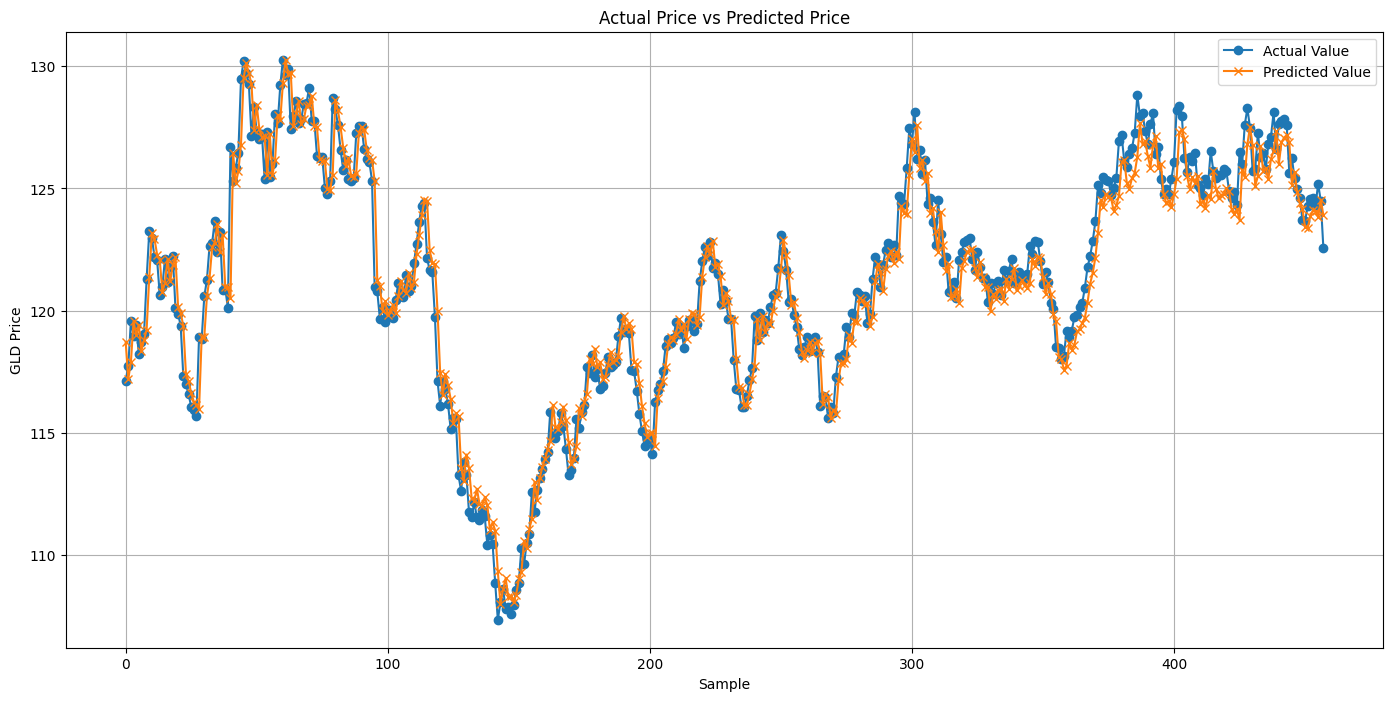

In [162]:
plt.figure(figsize=(17,8))
plt.plot(y_test.values,label='Actual Value',marker='o')
plt.plot(y_pred,label='Predicted Value',marker='x')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Sample')
plt.ylabel('GLD Price')
plt.grid(True)
plt.legend()
plt.show()

Residual plot

✅ Interpretation tip:

Random scatter → good model

Patterns (curve, funnel) → underfitting or heteroscedasticity

C:\Users\shaha\AppData\Local\Temp\ipykernel_13768\633695541.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


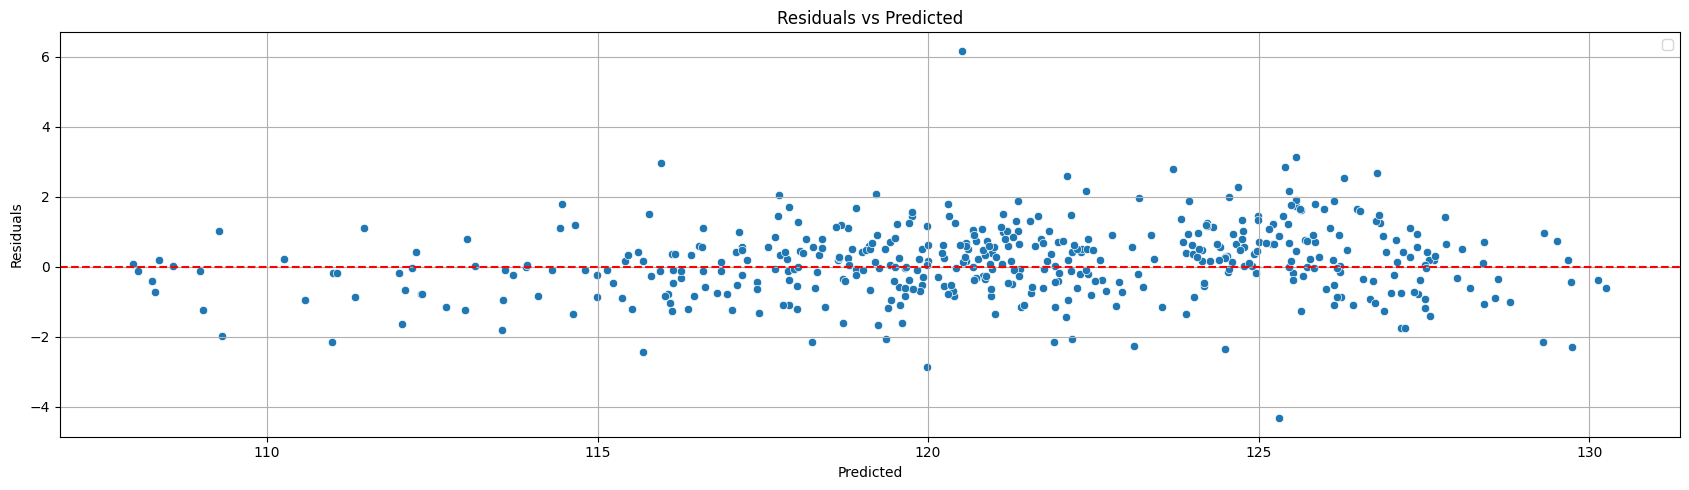

In [166]:
plt.figure(figsize=(17,5))
sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(0,color='red',linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Error Analysis : When is the model wrong?

Histogram of residuals

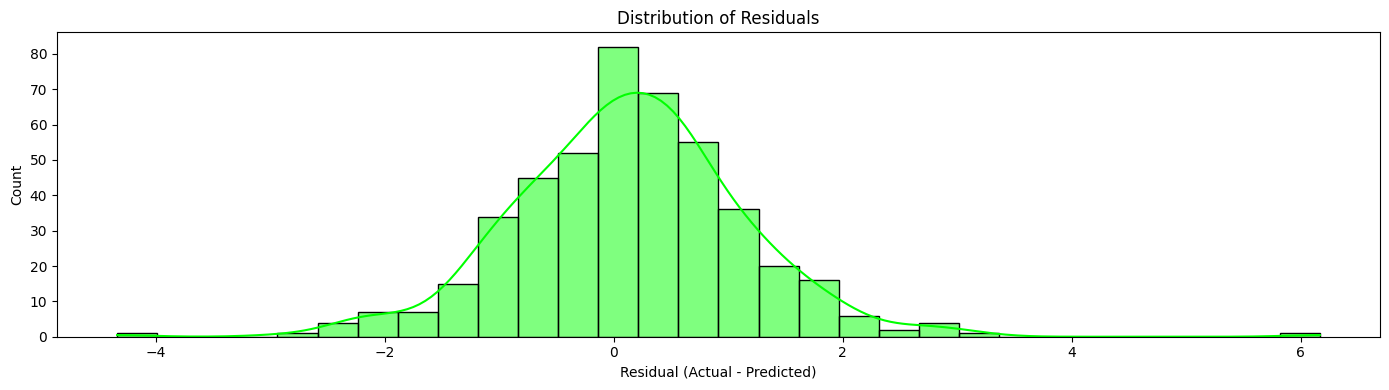

In [175]:
plt.figure(figsize=(14,4))
sns.histplot(residuals,bins=30,kde=True,color='lime')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()